# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

counter = 0
# For each cities in cities list, get data
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        weather_date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        counter = counter + 1
    
            
        print(f"Processing city number {counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Next city...")


print("City Data Complete")


Processing city number 1 : severo-kurilsk
City not found. Next city...
City not found. Next city...
Processing city number 2 : barrow
Processing city number 3 : kamaishi
Processing city number 4 : bluff
Processing city number 5 : upernavik
Processing city number 6 : saskylakh
Processing city number 7 : kirakira
Processing city number 8 : rikitea
Processing city number 9 : toamasina
Processing city number 10 : jamestown
Processing city number 11 : ponta do sol
Processing city number 12 : uige
City not found. Next city...
Processing city number 13 : ushuaia
Processing city number 14 : santa maria
Processing city number 15 : mahebourg
Processing city number 16 : baneh
Processing city number 17 : chokurdakh
Processing city number 18 : shirokiy
Processing city number 19 : inta
Processing city number 20 : punta arenas
Processing city number 21 : kristiansund
Processing city number 22 : plakhtiyivka
Processing city number 23 : coahuayana
Processing city number 24 : tuktoyaktuk
Processing city

Processing city number 209 : san rafael
City not found. Next city...
Processing city number 210 : geraldton
Processing city number 211 : college
Processing city number 212 : boyolali
Processing city number 213 : ostrovnoy
Processing city number 214 : kedrovyy
Processing city number 215 : santa cruz
Processing city number 216 : poum
Processing city number 217 : cururupu
Processing city number 218 : christchurch
Processing city number 219 : cherskiy
Processing city number 220 : hays
Processing city number 221 : caravelas
Processing city number 222 : man
Processing city number 223 : beringovskiy
Processing city number 224 : redlands
Processing city number 225 : cabo san lucas
Processing city number 226 : dingle
Processing city number 227 : mahanoro
Processing city number 228 : port blair
Processing city number 229 : shache
Processing city number 230 : pittsfield
Processing city number 231 : esperance
Processing city number 232 : sitka
Processing city number 233 : shabrovskiy
City not foun

Processing city number 407 : petukhovo
Processing city number 408 : bonthe
Processing city number 409 : malm
Processing city number 410 : monrovia
Processing city number 411 : las vegas
Processing city number 412 : catbalogan
Processing city number 413 : hay river
Processing city number 414 : raudeberg
Processing city number 415 : portales
Processing city number 416 : saint-pierre
Processing city number 417 : concarneau
Processing city number 418 : skibbereen
Processing city number 419 : goure
Processing city number 420 : bibiani
Processing city number 421 : augustow
Processing city number 422 : destin
Processing city number 423 : carnarvon
Processing city number 424 : bilma
Processing city number 425 : melita
Processing city number 426 : sinnamary
Processing city number 427 : hirara
City not found. Next city...
Processing city number 428 : zaysan
Processing city number 429 : hamina
Processing city number 430 : mount isa
City not found. Next city...
Processing city number 431 : beloha


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City' : city_name,
                          'Country' : country ,
                          'Lat' : latitude , 
                          'Lng' : longitude ,
                          'Date' : weather_date ,
                          'Max Temp' : temp ,
                          'Humidity' : humidity ,
                          'Cloudiness' : cloudiness ,
                          'Wind Speed' : wind_speed })
weather_df.to_csv("../output_data/cities.csv", index = False)

In [5]:
weather_df

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kuril'sk,RU,50.68,156.12,1607626190,25.81,90,88,16.51
1,Barrow,US,71.29,-156.79,1607626191,-5.57,90,100,13.11
2,Kamaishi,JP,39.27,141.88,1607626191,41.97,74,0,5.75
3,Bluff,NZ,-46.60,168.33,1607626083,44.01,94,100,12.91
4,Upernavik,GL,72.79,-56.15,1607626191,24.82,97,100,7.29
...,...,...,...,...,...,...,...,...,...
556,Kautokeino,NO,69.01,23.04,1607626280,20.17,97,89,6.93
557,Nikel,RU,69.41,30.22,1607626280,32.00,98,90,13.87
558,Road Town,VG,18.42,-64.62,1607626128,84.20,66,20,6.93
559,Timberlake,US,37.32,-79.26,1607626281,60.01,38,1,4.70


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df['Humidity'].astype(float)
weather_sorted = weather_df.sort_values(by='Humidity', ascending=False)
weather_sorted
#Sorted shows none are above 100

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
336,Hambantota,LK,6.12,81.12,1607625508,73.40,100,40,4.70
472,Mae Sai,TH,20.43,99.88,1607626265,60.01,100,14,1.12
404,Maun,BW,-19.98,23.42,1607626254,80.60,100,20,4.38
304,Asău,RO,46.43,26.40,1607625704,33.80,100,90,2.24
422,Carnarvon,AU,-24.87,113.63,1607626257,71.60,100,75,12.75
...,...,...,...,...,...,...,...,...,...
410,Las Vegas,US,36.17,-115.14,1607626225,59.00,15,1,3.36
429,Mount Isa,AU,-20.73,139.50,1607625527,86.00,15,100,13.87
414,Portales,US,34.19,-103.33,1607626168,66.99,15,20,8.05
208,San Rafael,AR,-34.62,-68.33,1607625768,99.27,14,8,5.28


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

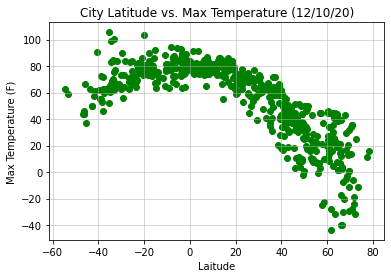

In [9]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "green")

# Set title
plt.title("City Latitude vs. Max Temperature (12/10/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

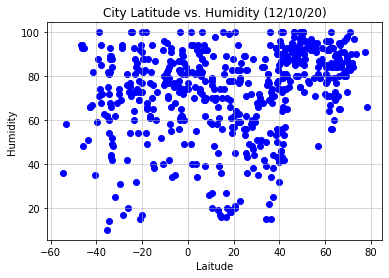

In [10]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue")


plt.title("City Latitude vs. Humidity (12/10/20)")


plt.xlabel("Laitude")


plt.ylabel("Humidity")


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

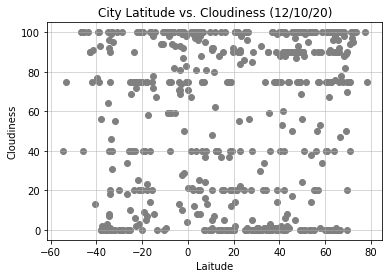

In [11]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "grey")


plt.title("City Latitude vs. Cloudiness (12/10/20)")


plt.xlabel("Laitude")


plt.ylabel("Cloudiness")


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

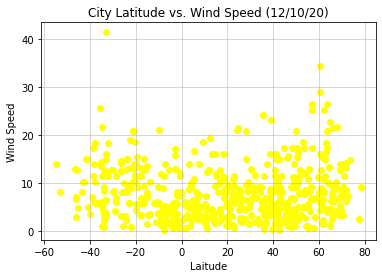

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "yellow")


plt.title("City Latitude vs. Wind Speed (12/10/20)")


plt.xlabel("Laitude")


plt.ylabel("Wind Speed")


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [13]:
northern_hemi = weather_df.loc[weather_df['Lat'] > 0]
southern_hemi = weather_df.loc[weather_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7338989269984666


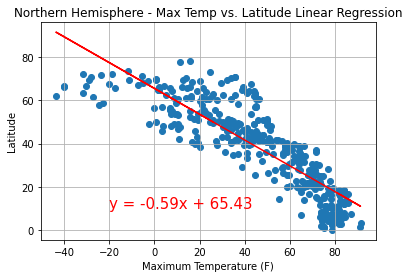

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = northern_hemi['Max Temp']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Maximum Temperature (F)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Northern Hemisphere vs Max Temp LR.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3127702308389993


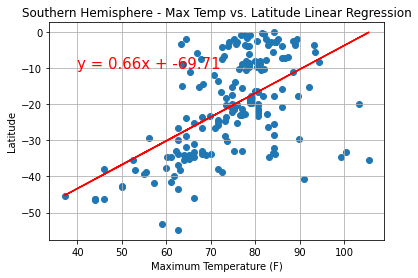

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southern_hemi['Max Temp']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(40,-10),fontsize=15,color="red")
plt.xlabel('Maximum Temperature (F)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Southern Hemisphere vs Max Temp LR.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13469525949087324


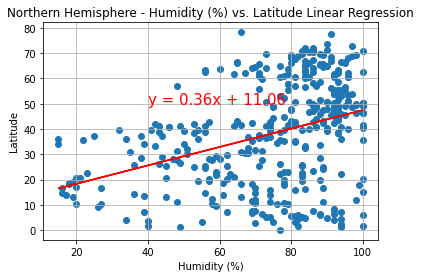

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northern_hemi['Humidity']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Northern Hemisphere vs Humidity LR.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015417487058093057


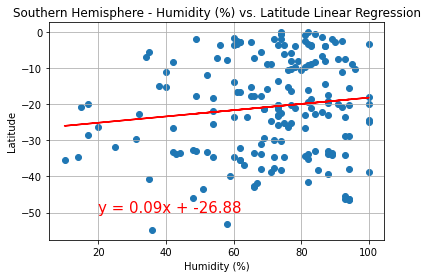

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = southern_hemi['Humidity']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Southern Hemisphere vs Humidity LR.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04706385529879239


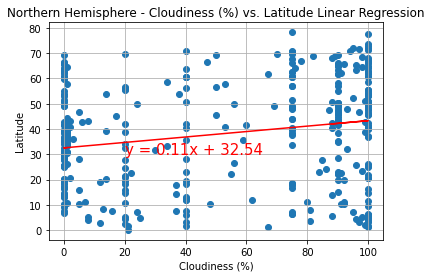

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = northern_hemi['Cloudiness']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Northern Hemisphere vs Cloudiness LR.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05214910699614313


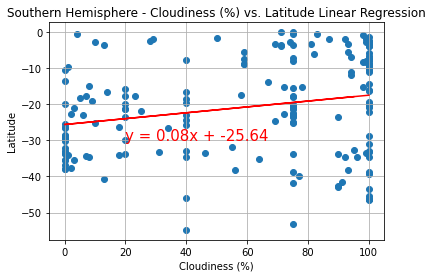

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = southern_hemi['Cloudiness']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,-30),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Southern Hemisphere vs Cloudiness LR.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.042351008271906805


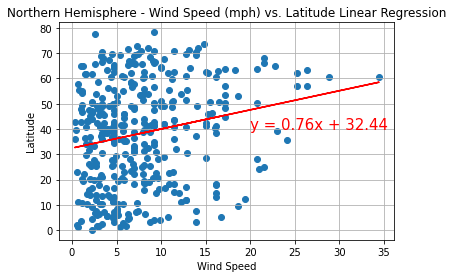

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = northern_hemi['Wind Speed']
y_values = northern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Northern Hemisphere vs Wind Speed LR.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07980517781744609


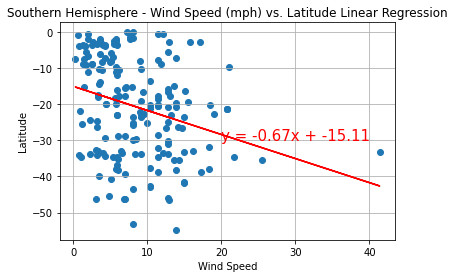

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = southern_hemi['Wind Speed']
y_values = southern_hemi['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(line_eq,(20,-30),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Images/Southern Hemisphere vs Wind Speed LR.png")